<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/2025-06-02/2025-06-02_counter_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

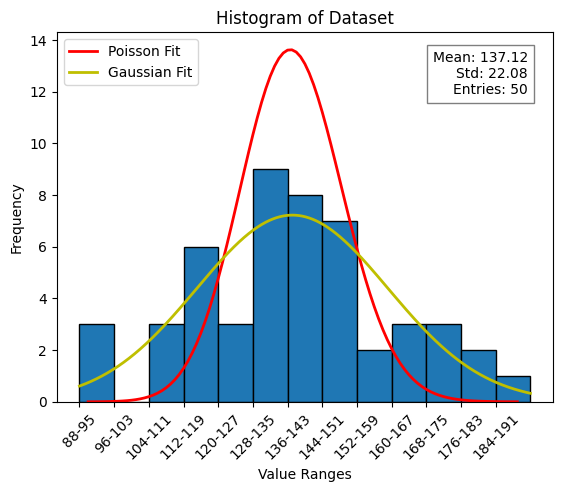

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import poisson, norm, chisquare

# Ortalama hesaplama fonksiyonu
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Standart sapma hesaplama fonksiyonu
def calculate_standard_deviation(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)


# Dataset
dataet = [94, 90, 125, 144, 164, 129, 119, 130, 115, 135, 143, 173, 144,165,176,136,155,137,148,133,143,132,106,107,92,114,109,116,131,140,147,160,185,171,177,172,135,117,126,135,116,145,155,136,142,145,143,145,127,132]
data = dataet[0:50]

# Define bin width
bin_width = 8

# Calculate bin edges based on min and max of data
min_val = min(data)  # 90
max_val = max(data)  # 173
start = (min_val // bin_width) * bin_width
end = ((max_val // bin_width) + 1) * bin_width  # 180
bin_edges = np.arange(start, end + bin_width, bin_width)  # [0, 10, 20, ..., 190]

# Poisson fit
lambda_est = calculate_mean(data)  # Use mean of data as lambda
x_pmf = np.arange(min_val, 190, 1)  # Range for Poisson PMF (0 to 180)
pmf = poisson.pmf(x_pmf, lambda_est)  # Poisson probabilities
# Scale PMF to match histogram's total frequency
pmf_scaled = pmf * len(data) * np.diff(bin_edges).mean()  # Approximate scaling
plt.plot(x_pmf, pmf_scaled, 'r-', label='Poisson Fit', linewidth=2)

# Define x-axis ticks (left edges) and labels (e.g., "90-99")
ticks = bin_edges[:-1] # [90, 100, ..., 170]
labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]
# ["90-99", "100-109", ..., "170-179"]

# Create histogram
plt.hist(data, bins=bin_edges, edgecolor='black')  # Bars between bin edges

# Gaussian fit
x = np.linspace(start, end, 1000)  # X-values from 0 to 190
pdf = norm.pdf(x, calculate_mean(data), calculate_standard_deviation(data))  # Gaussian probability density function
pdf_scaled = pdf * len(data) * bin_width  # Scale to match histogram frequency
plt.plot(x, pdf_scaled, 'y-', label='Gaussian Fit', linewidth=2)

# Customize x-axis
plt.xticks(ticks, labels, rotation=45)  # Rotate labels for readability

# Create the text string for the "legend"
text_str = f'Mean: {calculate_mean(data):.2f}\nStd: {calculate_standard_deviation(data):.2f}\nEntries: {len(data)}'

# Add the text at the top right corner
plt.text(0.95, 0.95, text_str, transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

# Add labels and title
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.legend()  # Show legend with color labels
plt.title('Histogram of Dataset')

# Display plot
plt.show()

# **Bin widthleri elle girerek yapılan**

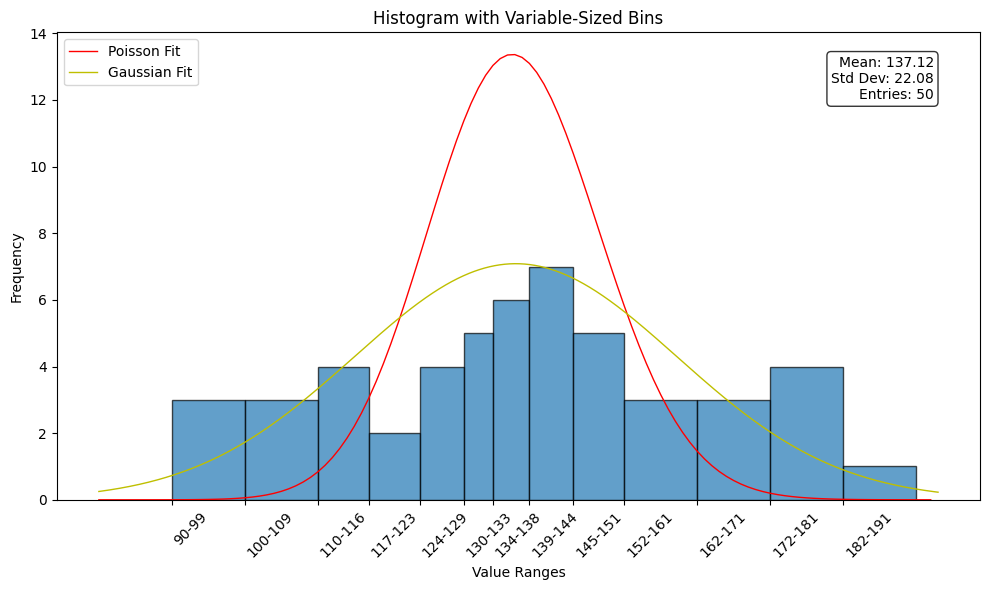

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset
data = [94, 90, 125, 144, 164, 129, 119, 130, 115, 135, 143, 173, 144, 165, 176, 136, 155, 137, 148, 133, 143, 132, 106, 107, 92, 114, 109, 116, 131, 140, 147, 160, 185, 171, 177, 172, 135, 117, 126, 135, 116, 145, 155, 136, 142, 145, 143, 145, 127, 132]
min_val = min(data)
max_val = max(data)
start = min(data) - 10  # e.g., 90 - 10 = 80
end = max(data) + 10    # e.g., 185 + 10 = 195

# Calculate statistics
mean = np.mean(data)
std = np.std(data)
n = len(data)

# Define variable-sized bin edges
bin_edges = [90, 100, 110, 117, 124, 130, 134, 139, 145, 152, 162, 172, 182, 192]

# Create labels for x-axis (e.g., '0-89', '90-99')
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1]-1)}' for i in range(len(bin_edges)-1)]

# Poisson
lambda_est = calculate_mean(data)  # Use mean of data as lambda
x_pmf = np.arange(min_val - 10, max_val + 10, 1)  # Range for Poisson PMF (0 to 180)
pmf = poisson.pmf(x_pmf, lambda_est)  # Poisson probabilities
pmf_scaled = pmf * len(data) * np.diff(bin_edges).mean() # Approximate scaling
"""np.diff(bin_edges).mean()"""  # Approximate scaling

# Create histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(data, bins=bin_edges, edgecolor='black', alpha=0.7)

# Scale PMF to match histogram's total frequency - POISSON
plt.plot(x_pmf, pmf_scaled, 'r-', label='Poisson Fit', linewidth=2)

# Gaussian fit
x = np.linspace(start, end, 1000)  # X-values from 0 to 190
pdf = norm.pdf(x, calculate_mean(data), calculate_standard_deviation(data))  # Gaussian probability density function
pdf_scaled = pdf * len(data) * np.diff(bin_edges).mean()  # Scale to match histogram frequency
plt.plot(x, pdf_scaled, 'y-', label='Gaussian Fit', linewidth=2)

# Set x-axis labels
plt.xticks(bin_edges[:-1], bin_labels, rotation=45, ha='left')

# Add labels and title
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Histogram with Variable-Sized Bins')
plt.legend()

# Add annotation for statistics in top-right corner
stats_text = f'Mean: {mean:.2f}\nStd Dev: {std:.2f}\nEntries: {n}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('histogram_variable_bins.png')


## **Chi square**

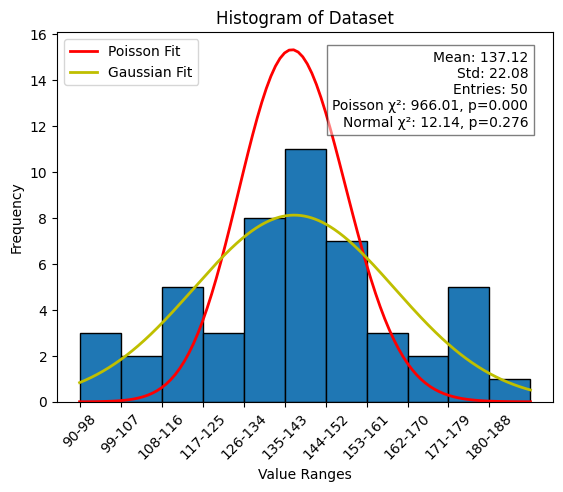

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import poisson, norm, chisquare, chi2

# Ortalama hesaplama fonksiyonu
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Standart sapma hesaplama fonksiyonu
def calculate_standard_deviation(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)

# Dataset
dataet = [94, 90, 125, 144, 164, 129, 119, 130, 115, 135, 143, 173, 144, 165, 176, 136, 155, 137, 148, 133, 143, 132, 106, 107, 92, 114, 109, 116, 131, 140, 147, 160, 185, 171, 177, 172, 135, 117, 126, 135, 116, 145, 155, 136, 142, 145, 143, 145, 127, 132]
data = dataet[0:50]

# Define bin width
bin_width = 9

# Compute mean and standard deviation once
mu = calculate_mean(data)
sigma = calculate_standard_deviation(data)

# Calculate bin edges based on min and max of data
min_val = min(data)  # 90
max_val = max(data)  # 185
start = (min_val // bin_width) * bin_width
end = ((max_val // bin_width) + 1) * bin_width
bin_edges = np.arange(start, end + bin_width, bin_width)  # [88, 96, ..., 192]

# Compute observed frequencies
hist, _ = np.histogram(data, bins=bin_edges)

# Poisson fit chi-square test
lambda_est = mu  # Lambda is the mean
expected_probs_poisson = []
for i in range(len(bin_edges) - 1):
    a = bin_edges[i]
    b = bin_edges[i + 1]
    # Use CDF to compute probability for bin [a, b): P(a <= X < b)
    p = poisson.cdf(b - 1, lambda_est) - poisson.cdf(a - 1, lambda_est)
    expected_probs_poisson.append(p)

# Convert to array and normalize to ensure sum matches len(data)
expected_probs_poisson = np.array(expected_probs_poisson)
expected_probs_poisson /= expected_probs_poisson.sum()  # Normalize probabilities
expected_poisson = expected_probs_poisson * len(data)

# Check for small or zero expected frequencies
if np.any(expected_poisson <= 0):
    print("Error: Some expected frequencies for Poisson fit are zero or negative.")
elif np.any(expected_poisson < 5):
    print("Warning: Some expected frequencies for Poisson fit are less than 5.")

# Perform chi-square test for Poisson
chi2_stat_poisson, p_poisson = chisquare(hist, expected_poisson)
df_poisson = len(hist) - 1 - 1  # Adjust for 1 estimated parameter (lambda)

# Normal fit chi-square test
expected_probs_normal = [norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma) for i in range(len(bin_edges)-1)]
expected_probs_normal = np.array(expected_probs_normal)
expected_probs_normal /= expected_probs_normal.sum()  # Normalize probabilities
expected_normal = expected_probs_normal * len(data)

# Check for small or zero expected frequencies
if np.any(expected_normal <= 0):
    print("Error: Some expected frequencies for normal fit are zero or negative.")
elif np.any(expected_normal < 5):
    print("Warning: Some expected frequencies for normal fit are less than 5.")

# Perform chi-square test for Normal
chi2_stat_normal, p_normal = chisquare(hist, expected_normal)
df_normal = len(hist) - 1 - 2  # Adjust for 2 estimated parameters (mu, sigma)

# Poisson fit
x_pmf = np.arange(min_val, 190, 1)
pmf = poisson.pmf(x_pmf, lambda_est)
pmf_scaled = pmf * len(data) * np.diff(bin_edges).mean()
plt.plot(x_pmf, pmf_scaled, 'r-', label='Poisson Fit', linewidth=2)

# Define x-axis ticks and labels
ticks = bin_edges[:-1]
labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

# Create histogram
plt.hist(data, bins=bin_edges, edgecolor='black')

# Gaussian fit
x = np.linspace(start, end, 1000)
pdf = norm.pdf(x, mu, sigma)
pdf_scaled = pdf * len(data) * bin_width
plt.plot(x, pdf_scaled, 'y-', label='Gaussian Fit', linewidth=2)

# Customize x-axis
plt.xticks(ticks, labels, rotation=45)

# Create the text string for the "legend"
text_str = f'Mean: {mu:.2f}\nStd: {sigma:.2f}\nEntries: {len(data)}\n' \
           f'Poisson χ²: {chi2_stat_poisson:.2f}, p={p_poisson:.3f}\n' \
           f'Normal χ²: {chi2_stat_normal:.2f}, p={p_normal:.3f}'

# Add the text at the top right corner
plt.text(0.95, 0.95, text_str, transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

# Add labels and title
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Dataset')

# Display plot
plt.show()